In [19]:
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
import pandas as pd
import os
from typing import *
from pandas.tseries.holiday import USFederalHolidayCalendar as Calendar
from multiprocessing import Pool
import datetime as dt

# pd.set_option('display.max_rows', 500)

#non-interactive process writing to file
# matplotlib.use('Agg')

data = '../sample_data/preprocessed_USDJPY.csv'
df = pd.read_csv(data, sep=",")[['DateTime', 'Open','High','Low','Close']] 
df['DateTime'] = pd.to_datetime(df['DateTime'])
# df = df.groupby(pd.Grouper(key='DateTime', freq='1h')).mean().reset_index()
# df = df.set_index('DateTime')

In [35]:
day = df.groupby(pd.Grouper(key='DateTime', freq='2d')).mean().reset_index()

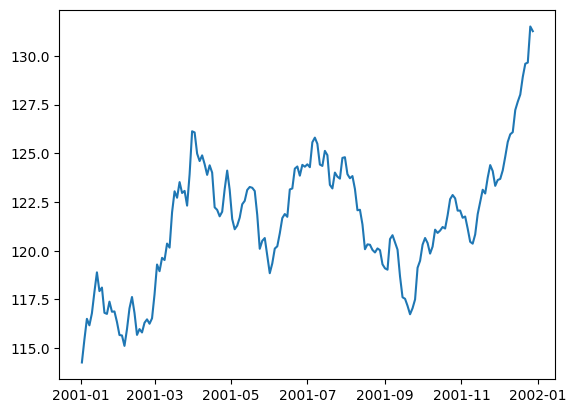

In [33]:
plt.plot(day.DateTime,day.Close)

In [23]:
day

,DateTime,Open,High,Low,Close
0,2001-01-02,114.405116,114.407209,114.403023,114.405116
1,2001-01-03,114.261845,114.268016,114.256274,114.262057
2,2001-01-04,114.608854,114.617199,114.601741,114.610301
3,2001-01-05,116.392041,116.401770,116.382617,116.392535
4,2001-01-06,NaN,NaN,NaN,NaN
...,...,...,...,...,...
356,2001-12-24,129.653148,129.658935,129.646671,129.652724
357,2001-12-25,NaN,NaN,NaN,NaN
358,2001-12-26,131.122683,131.130488,131.118537,131.126098
359,2001-12-27,131.519457,131.525272,131.513060,131.519161


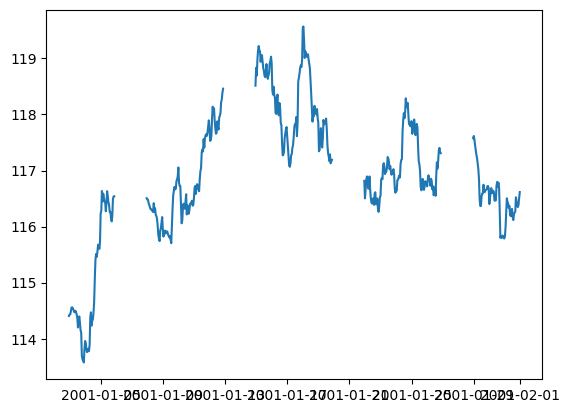

In [16]:
mini_df = df.loc[(df.DateTime > '2001-01') & (df.DateTime < '2001-02')]
hour = mini_df.groupby(pd.Grouper(key='DateTime', freq='1h')).mean().reset_index()
plt.plot(hour.DateTime,hour.Close)

In [25]:
# count number of missing data
count_nan = day.Close.isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: 52


In [24]:
day.DateTime.dt.day_name()

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4       Saturday
         ...    
356       Monday
357      Tuesday
358    Wednesday
359     Thursday
360       Friday
Name: DateTime, Length: 361, dtype: object

In [26]:
missing = day[day.Close.isna()]
missing.DateTime.dt.day_name()

4      Saturday
11     Saturday
18     Saturday
25     Saturday
32     Saturday
39     Saturday
46     Saturday
53     Saturday
60     Saturday
67     Saturday
74     Saturday
81     Saturday
88     Saturday
95     Saturday
102    Saturday
109    Saturday
116    Saturday
123    Saturday
130    Saturday
137    Saturday
144    Saturday
151    Saturday
158    Saturday
165    Saturday
172    Saturday
179    Saturday
186    Saturday
193    Saturday
200    Saturday
207    Saturday
214    Saturday
221    Saturday
228    Saturday
235    Saturday
242    Saturday
249    Saturday
256    Saturday
263    Saturday
270    Saturday
277    Saturday
284    Saturday
291    Saturday
298    Saturday
305    Saturday
312    Saturday
319    Saturday
326    Saturday
333    Saturday
340    Saturday
347    Saturday
354    Saturday
357     Tuesday
Name: DateTime, dtype: object

In [28]:
day.iloc[357,:]

DateTime    2001-12-25 00:00:00
Open                        NaN
High                        NaN
Low                         NaN
Close                       NaN
Name: 357, dtype: object

In [31]:
# check if sundays only include one value....
hour[hour.DateTime.dt.day_name()=='Sunday']
# df[df.DateTime.dt.day_name()=='Sunday']

,DateTime,Open,High,Low,Close
97,2001-01-07 00:00:00,NaN,NaN,NaN,NaN
98,2001-01-07 01:00:00,NaN,NaN,NaN,NaN
99,2001-01-07 02:00:00,NaN,NaN,NaN,NaN
100,2001-01-07 03:00:00,NaN,NaN,NaN,NaN
101,2001-01-07 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
620,2001-01-28 19:00:00,NaN,NaN,NaN,NaN
621,2001-01-28 20:00:00,NaN,NaN,NaN,NaN
622,2001-01-28 21:00:00,NaN,NaN,NaN,NaN
623,2001-01-28 22:00:00,NaN,NaN,NaN,NaN
